# Singular Value Decomposition

Singular Value Decomposition (SVD) is a mathematical technique used to decompose a matrix into three other matrices. For a given matrix \( A \) of size \( $m \times n$ \), SVD can be expressed as:

\[
$A = U \Sigma V^T$
\]

Where:
- \( U \) is an \( $m \times m$ \) orthogonal matrix whose columns are the left singular vectors of \( A \).
- \( $\Sigma$ \) is an \( $m \times n$ \) diagonal matrix containing the singular values of \( A \) in descending order.
- \( $V^T$ \) is the transpose of an \( $n \times n$ \) orthogonal matrix whose columns are the right singular vectors of \( A \).

### How it Works
1. **Decomposition**: The matrix \( A \) is decomposed into the product of \( U \), \( $\Sigma$ \), and \( $V^T$ \).
2. **Singular Values**: The diagonal entries of \( $\Sigma$ \) are the singular values; these represent the importance of their corresponding vectors in U and V for approximating the original matrix.
3. **Dimensionality Reduction**: By retaining only the largest singular values and their corresponding singular vectors, we can approximate \( A \) with reduced complexity.

For example, if we keep only the top \( k \) singular values, the approximation becomes:

\[
$A_k = U_k \Sigma_k V_k^T$
\]

Where \( $U_k$ \), \( $\Sigma_k$ \), and \( $V_k$ \) are truncated versions of \( $U$ \), \( $\Sigma$ \), and \( $V$ \), respectively.

### Why SVD is Useful
- **Compression**: SVD allows us to compress data by retaining only the most significant singular values, reducing storage requirements.
- **Noise Reduction**: By discarding smaller singular values, we can remove noise from data while preserving its essential structure.



In [1]:
# this section adds the package path to the system path so it can be used here
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))


import mltoolbox as ml # my module

import pandas as pd
import matplotlib.pyplot as plt

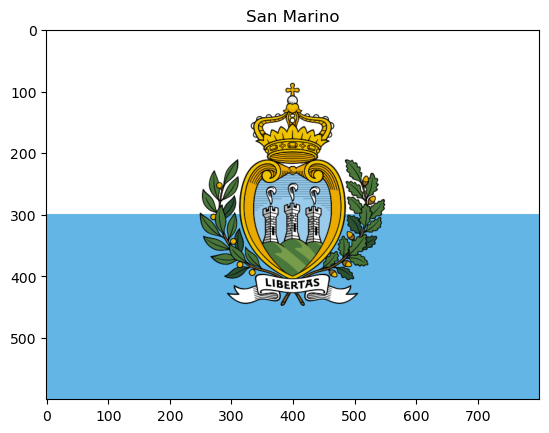

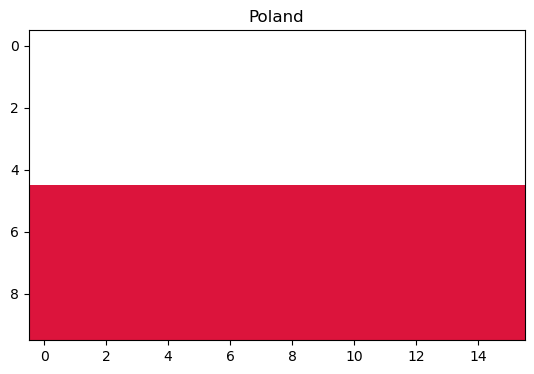

In [2]:
import imageio.v3 as iio

sm = iio.imread('../../Datasets/images/sm.png')
plt.imshow(sm)
plt.title("San Marino")
plt.show()

pl = iio.imread('../../Datasets/images/pl.png')
plt.imshow(pl)
plt.title("Poland")
plt.show()

In [3]:

print(sm.shape)
print(pl.shape)


(600, 800, 3)
(10, 16, 3)


### The Polish flag

It is simple enough to only require one singular value from each of the red, green, and blue layers to fully represent the flag. 

The different colors act as three completely independant matricies, each with its own Singular Value Decomposition.

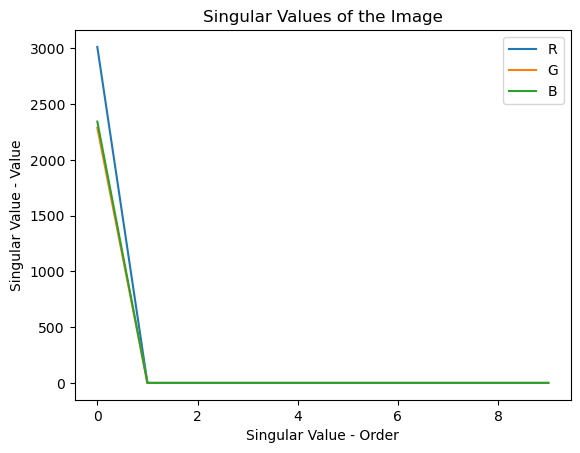

In [4]:
poland = ml.SVDImageCompressor(1)
U,S,V = poland.compress_image('../../Datasets/images/pl.png')

poland.plot_sigma()

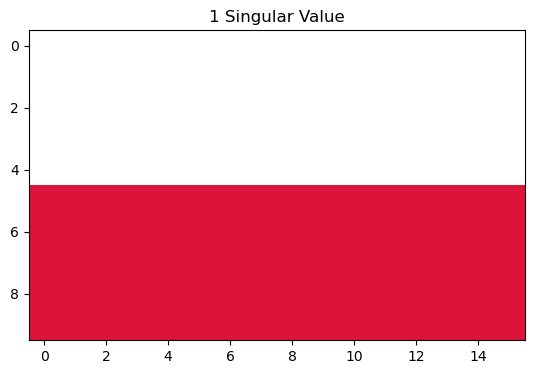

In [5]:

I = ml.expand_image(U,S,V) # takes the reduced U,S,V and recreates the image from them

plt.imshow(I)
plt.title("1 Singular Value")
plt.show()


### San Marino

This flag is significantly more complicated. It has a seal on the center that requires much more data to record correctly. The main body of the flag is very clear after 50 out of 600 singular values, but it takes until 300 to fully remove the visible discoloration on the flag.

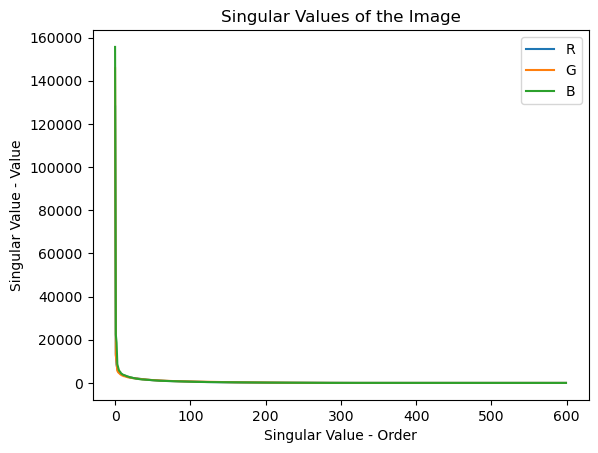

In [6]:
sanmarino = ml.SVDImageCompressor(1)
U,S,V = sanmarino.compress_image('../../Datasets/images/sm.png')

sanmarino.plot_sigma()

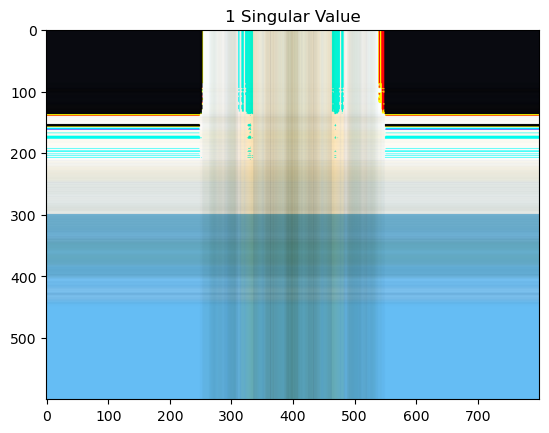

In [7]:
I = ml.expand_image(U,S,V)

plt.imshow(I)
plt.title("1 Singular Value")
plt.show()

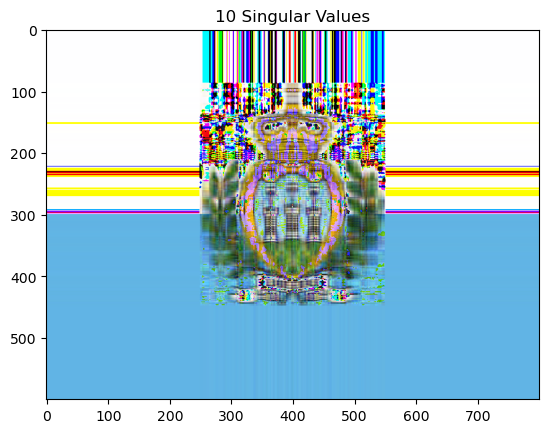

In [8]:
sanmarino = ml.SVDImageCompressor(10)
U,S,V = sanmarino.compress_image('../../Datasets/images/sm.png')

I = ml.expand_image(U,S,V)

plt.imshow(I)
plt.title("10 Singular Values")
plt.show()

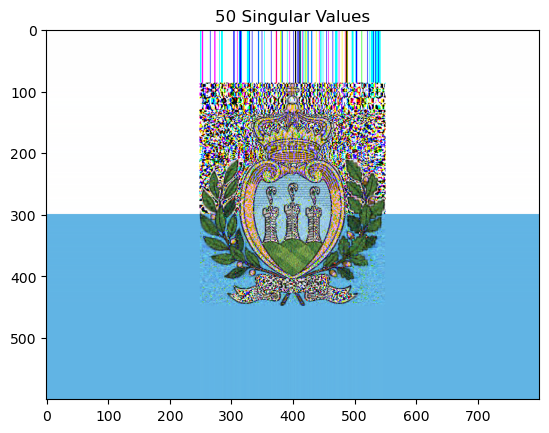

In [9]:
sanmarino = ml.SVDImageCompressor(50)
U,S,V = sanmarino.compress_image('../../Datasets/images/sm.png')

I = ml.expand_image(U,S,V)

plt.imshow(I)
plt.title("50 Singular Values")
plt.show()

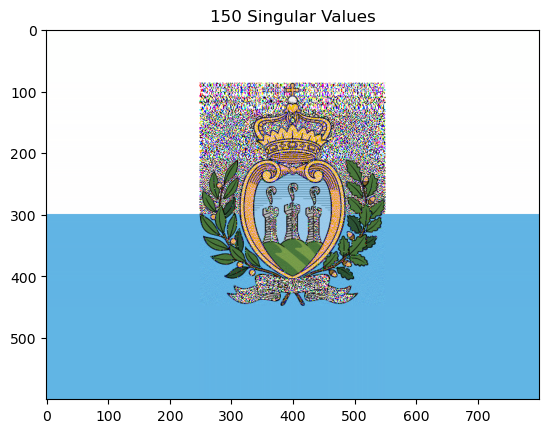

In [10]:
sanmarino = ml.SVDImageCompressor(150)
U,S,V = sanmarino.compress_image('../../Datasets/images/sm.png')

I = ml.expand_image(U,S,V)

plt.imshow(I)
plt.title("150 Singular Values")
plt.show()

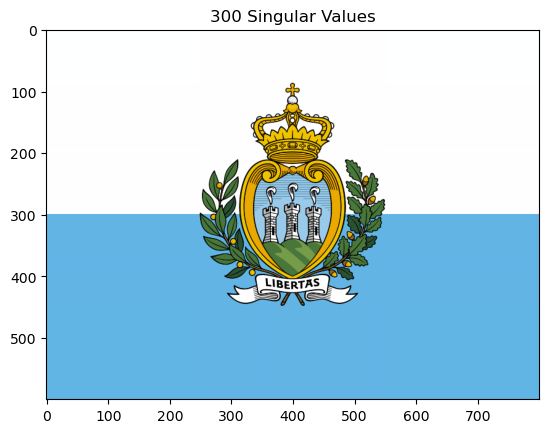

In [11]:
sanmarino = ml.SVDImageCompressor(300)
U,S,V = sanmarino.compress_image('../../Datasets/images/sm.png')

I = ml.expand_image(U,S,V)

plt.imshow(I)
plt.title("300 Singular Values")
plt.show()

## Comments:

It is very clear that the issue with compressing the San Marino flag is the compex seal in the center of it. All the innaccuracies of the model in the 50 value and 150 value compressions are a kaleidoscope effect on the white background around the seal. 

For it to be fully represented with SVD, it requiers 300 out of 600 singular values, this means there is no actual benefit to the compression as U and V are only reduced to half the original matrix size, so the two of them store the same amount of values as the original matrix.

It is very interesting that this is the case given how sharp the drop in value is as singular values decrease. But this is mae clear when we plot the values again but without the 100 largest singular values. 

As seen below, after 300, the singular values are 0, there is no new data to be gained from them. It seems that even the small singualr values in the 150-300 range have enough of an impact to make the image look like static.

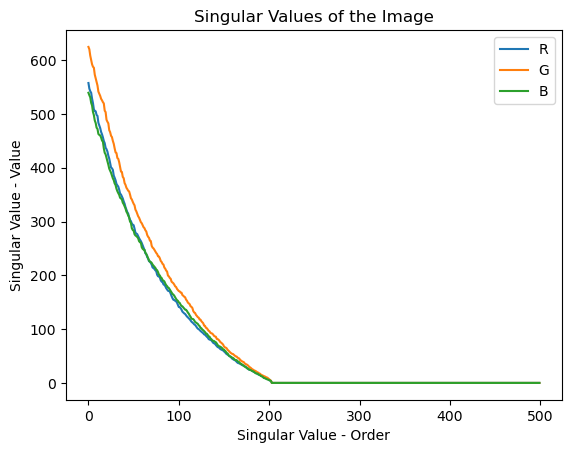

In [12]:
sanmarino.plot_sigma(100)